# IMDB 5000 USA Movie Data Visualization Analysis 


In order to get a better understanding of the movie industry in US,  I got a dataset from Kaggle and analyzed 5000 records of USA movie data from 1929 to 2015 in terms of movie plot key words analysis, movie revenue and profit evolution, as well as movie flops and success analysis. 

# Table of Content

&#8195;[**1. Environment Configuration**](#1.-Environment-Configuration)


&#8195;[**2. Data Preparation**](#1.-Data-Preparation)
>[**2.1. Import Data**](#2.1.-Import-Data)  
>[**2.2. Data Information**](#2.1.-Data-Information) 

&#8195;[**3. IMDB Movie Data Exploration**](#3.-IMDB-Movie-Data-Exploration)

>[**3.1. Movie Distribution by County Originated**](#3.1.-Movie-Distribution-by-County-Originated)  

>[**3.2. Evolution of Count of Movies Over Year in USA**](#3.2.-Evolution of Count of Movies Over Year in USA)  

>[**3.3. Movie Plot Key Words Analysis**](#3.3.-Movie-Plot-Key-Words-Analysis ) 

>[**3.4. Movie Revenue and Budget Distribution**](#3.4.- Movie-Revenue-and-Budget-Distribution) 

>[**3.5. Movie Flops and Success by Genre**](#3.5.-Movie-Flops-and-Success-by-Genre ) 

>[**3.6. Movie Profitability Analysis by Genre**](#3.6.-Movie-Profitability-Analysis-by-Genre) 

>[**3.7. Movie Profitability Trending Analysis**](#3.7.-Movie-Profitability-Trending-Analysis ) 

>[**3.8. Top and Least Profitable Movies**](#3.8.-Top-and-Least-Profitable-Movies ) 

# 1. Environment Configuration

In [138]:
!pip install wordcloud
from wordcloud import WordCloud
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as tick
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Data Preparation

### 2.1. Import Data   
This project used the following four datasets, which are available in  (**Datasource**: [IMDB data](https://www.kaggle.com/carolzhangdc/imdb-5000) ) 

In [139]:
uploaded = files.upload()

Saving movie.csv to movie (1).csv


In [140]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "movie.csv" with length 1494688 bytes


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['movie.csv'].decode('utf-8')))

### 2.2. Data Information

This project used the following four datasets, which are available in  (**Datasource**: [IMDB data](https://www.kaggle.com/carolzhangdc/imdb-5000) ) 

Key columns from the dataset:

|Column Name | Describtion | Example  | 
|--|--|--|
| `Movie Title` |  Name of the Movie  |  Avatar | 
| `Title Year` |  Movie released year  |  2015 | 
| `Director Name` |  Name of the Movie Director  | James Cameron |
| `Director Facebook likes` |  Nunber of facebook like under director's facebook acount  | 563 |
| `Actor Name` |  Name of the Movie Director  | Johnny Depp |
| `Actor Facebook likes` |  Nunber of facebook like under actor's facebook acount  | 2000 |
| `Genres` |  Movie type  | Action |
| `Gross` |  Total Revenue of the Movie  | 760505000 |
| `Budget` |  Total Money spend on Movie  | 237000000 |


# 3. IMDB Movie Data Exploration

## 3.1. Movie Distribution by County Originated

In [0]:
df['movie_country'] = df['country'].apply(lambda x: 'USA' if x == 'USA' else 'Other Countries')
country = df['movie_country'].value_counts().index
count_of_movies_per_country = df['movie_country'].value_counts().values
count_of_movies = [str(count_of_movies)+" movies" for count_of_movies in count_of_movies_per_country]

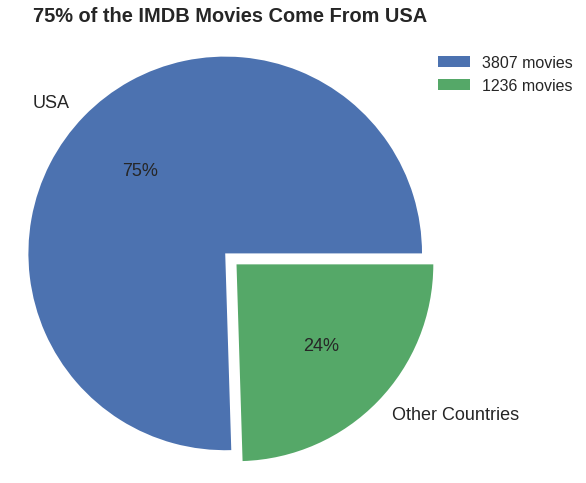

In [143]:
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.pie(x=df['movie_country'].value_counts(), explode=(0,0.08), autopct='%i%%',
        labels=df['movie_country'].value_counts().index, textprops={'fontsize': 18})
plt.title("75% of the IMDB Movies Come From USA", fontsize=20, weight='bold', y=1.03)
plt.axis('equal')
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1), labels=count_of_movies, fontsize=16);

<li>75% percent of IMDB movies came from USA. In the following analysis, I will just focus on USA movie day.

## 3.2. Evolution of Count of Movies Over Year in USA






In [0]:
df_USA = df[df['country']=='USA'].dropna()
df_USA=df_USA.drop_duplicates(['movie_title','profit'])
df_USA['unique_genre'] = df_USA['genres'].str.split('|').str.get(-1)
df_USA['title_year']=df_USA['title_year'].astype(int)

In [0]:
x_ticks = ['20s','30s', '40s','50s','60s','70s','80s','90s','2000s','2010-2015']

In [0]:
df_USA['decade']=df_USA['title_year'].apply(lambda x: '20s' if x<1930
                                                 else '30s' if x>=1930 and x<1940 
                                                 else '40s' if x>=1940 and x<1950
                                                 else '50s' if x>=1950 and x<1960
                                                 else '60s' if x>=1960 and x<1970
                                                 else '70s' if x>=1970 and x<1980
                                                 else '80s' if x>=1980 and x<1990
                                                 else '90s' if x>=1990 and x<2000 
                                                 else '2000s' if x>=2000 and x<2010
                                                 else '2010-2015') # if x>=2010 and x<2020

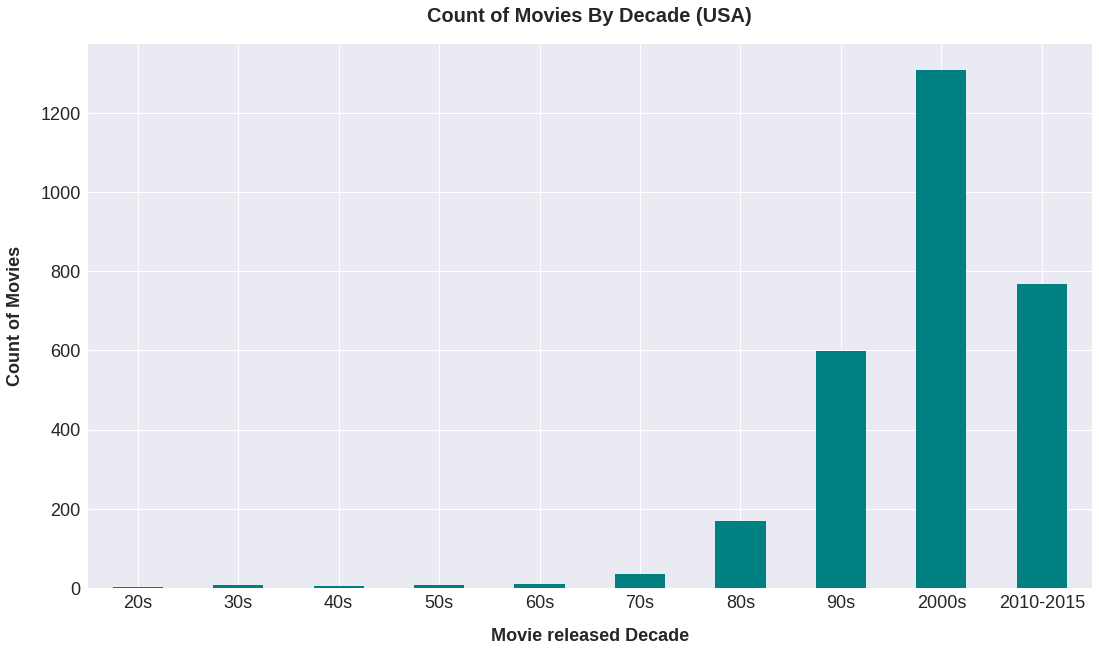

In [165]:
df_USA.groupby('decade').size().reindex(x_ticks).plot(kind='bar', figsize=(18, 10), color='teal')
plt.title("Count of Movies By Decade (USA)", fontsize=20, weight='bold', y=1.03)
plt.xlabel("Movie released Decade", fontsize=18, weight="bold", labelpad=16)
plt.ylabel("Count of Movies", fontsize=18, weight="bold", labelpad=16)
plt.xticks(fontsize=18, rotation=360)
plt.yticks(fontsize=18);

*   The boom of the Movie industry was seen after 90s and got it's peak in 2000s. 

## 3.3. Movie Plot Key Words Analysis 





In [0]:
text='start '
for row in df_USA['plot_keywords'].str.split('|'):
  for word in row:
    text=text +' '+ word

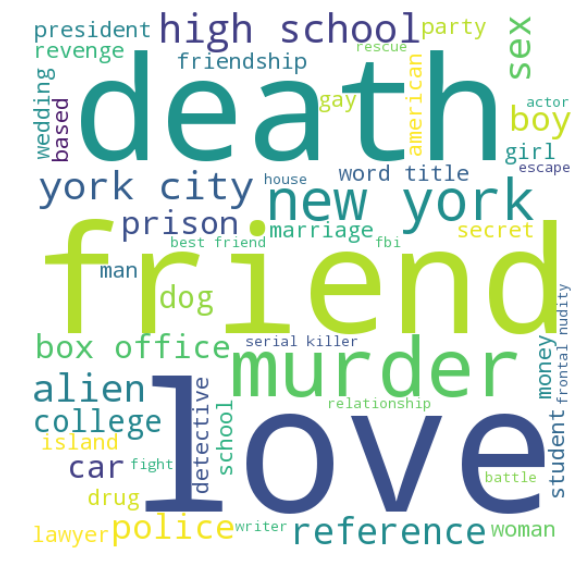

In [149]:
wordcloud = WordCloud(width=500, height=500,background_color='white', max_words=50).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig=plt.gcf()
fig.set_size_inches(18,10) 

*   Love, Friend, Death, Murder are most populer movie plots

## 3.4. Movie Revenue and Budget Distribution





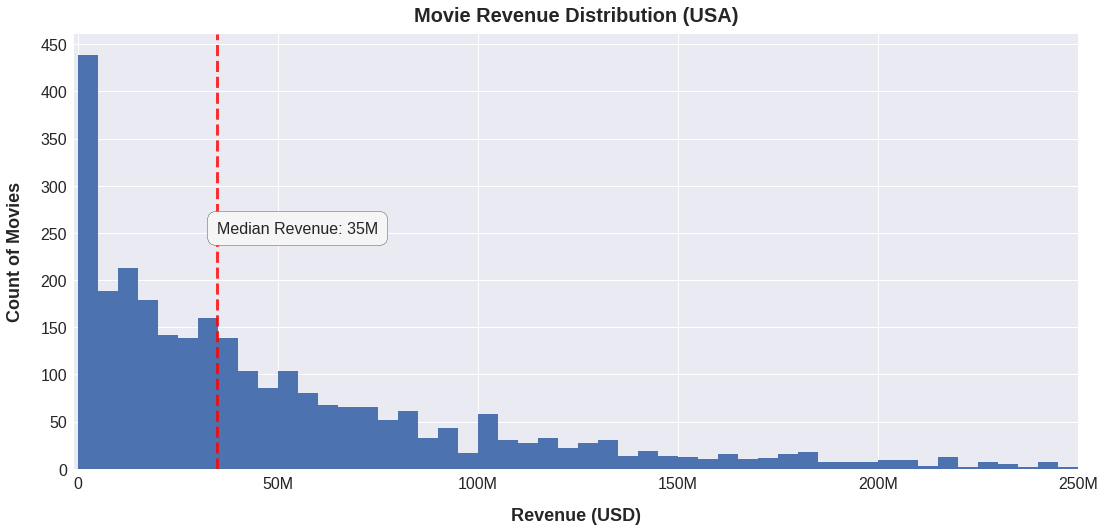

In [150]:
xticks = ['0','50M','100M','150M','200M','250M']
plt.figure(figsize=(18, 8))
plt.hist(df_USA.gross/1000000.0, bins = np.arange(min(df_USA.gross/1000000.0),max(df_USA.gross/1000000.0),5))
plt.xlim(-1,250)
plt.axvline(x=(df_USA['gross']/1000000.0).median(), color='red', linestyle='--', label = 'median movie revenue in USA', alpha=0.8,linewidth=3)
plt.title("Movie Revenue Distribution (USA)", fontsize=20, weight="bold", y=1.015)
plt.xlabel("Revenue (USD)", fontsize=18, weight="bold", labelpad=16)
plt.ylabel("Count of Movies", fontsize=18, weight="bold", labelpad=16)
plt.locator_params(axis='y', nbins=10)
plt.xticks(np.arange(0, 300, step=50), xticks,fontsize=16)
plt.yticks(fontsize=16)
plt.text(x=(df_USA['gross']/1000000.0).median(), y=250, s="Median Revenue: 35M", fontsize=16,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.6"));
#plt.legend(fontsize=16);

*   Most movies' revenue is from 5M to 50M

*   The median movie Revenue is 35 million

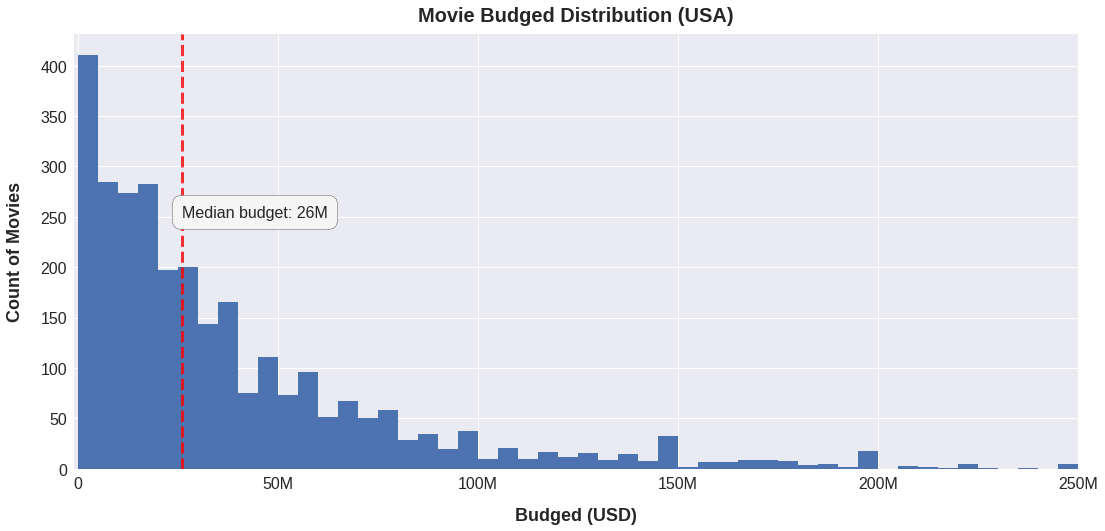

In [151]:
xticks = ['0','50M','100M','150M','200M','250M']
plt.figure(figsize=(18, 8))
plt.hist(df_USA.budget/1000000.0, bins = np.arange(min(df_USA.budget/1000000.0),max(df_USA.budget/1000000.0),5))
plt.xlim(-1,250)
plt.axvline(x=(df_USA['budget']/1000000.0).median(), color='red',linestyle='--', label = 'median movie budget in USA', alpha=0.8,linewidth=3)
plt.title("Movie Budged Distribution (USA)", fontsize=20, weight="bold", y=1.015)
plt.xlabel("Budged (USD)", fontsize=18, weight="bold", labelpad=16)
plt.ylabel("Count of Movies", fontsize=18, weight="bold", labelpad=16)
plt.xticks(np.arange(0, 300, step=50), xticks, fontsize=16)
plt.yticks(fontsize=16)
plt.text(x=(df_USA['budget']/1000000.0).median(), y=250, s="Median budget: 26M", fontsize=16,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.6"));
#plt.legend(fontsize=16);

*   Most movies' budget is from 5M to 50M, similar to movie revenue.
*   The median movie Budget is 26 million, 9 million lower then median revenue. 

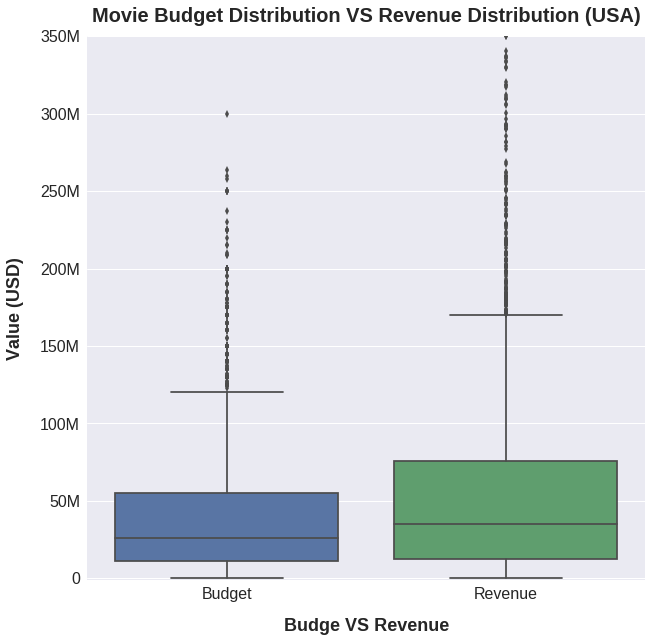

In [152]:
yticks=['0','50M','100M','150M','200M','250M','300M','350M']
xticks=['Budget', 'Revenue']
plt.figure(figsize=(10, 10))
sns.boxplot(x='variable', y='value', data=pd.melt(round(df_USA[['budget','gross']]/1000000.0,2)))
plt.title("Movie Budget Distribution VS Revenue Distribution (USA)", fontsize=20, weight="bold", y=1.015)
plt.xlabel("Budge VS Revenue", fontsize=18, weight="bold", labelpad=16)
plt.ylabel("Value (USD)", fontsize=18, weight="bold", labelpad=16)
plt.xticks(np.arange(0, 2, step=1), xticks, fontsize=16)
plt.yticks(np.arange(0, 400, step=50), yticks, fontsize=16)
plt.ylim(-1,350);

*   Movie revenue's median and 75th quantile is much higher then budget. 
*   Movie revenue has much more outliers. 

## 5.5. Movie Flops and Success by Genre.





In [0]:
df_USA['profit']=df_USA['gross']-df_USA['budget']

df_USA_genres=df_USA.groupby('unique_genre').apply(lambda x: pd.Series({
                                          'median_score': x.imdb_score.median(),
                                           'median_gross': x.gross.median()/1000000.0,
                                          'median_profit': x.profit.median()/1000000.0,
                                          'median_budget': x.budget.median()/1000000.0,
                                          'flops_count': x[x.profit<0].unique_genre.count(),
                                          'succeed_count': x[x.profit>0].unique_genre.count(),
                                          'count_of_films': x.unique_genre.count()})).round(2).reset_index().sort_values(by='count_of_films')

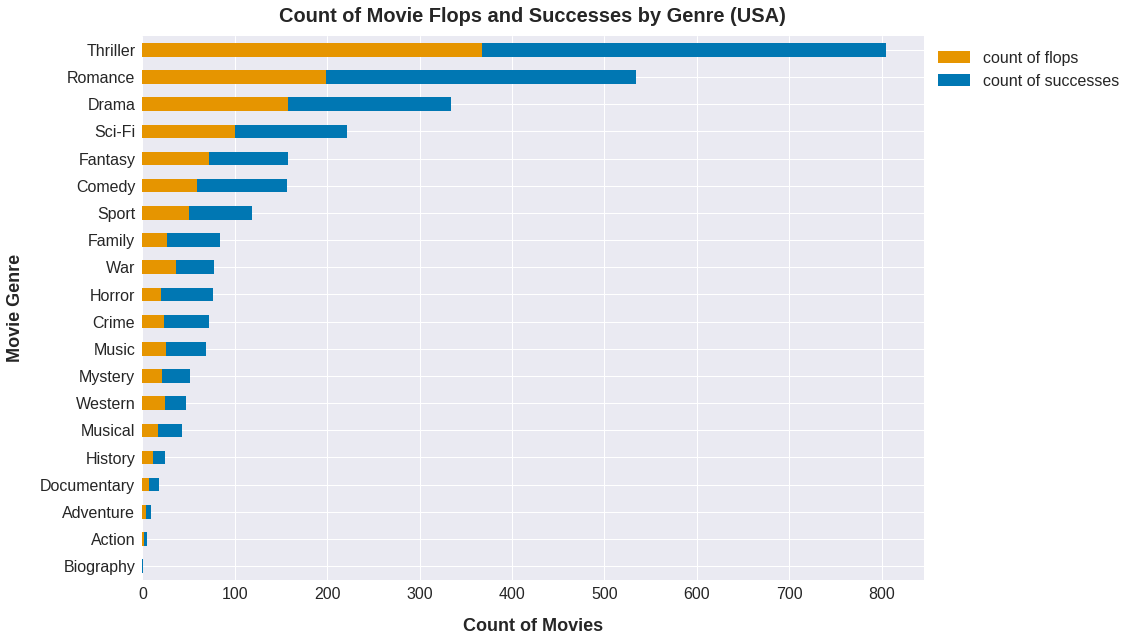

In [154]:
df_USA_genres.set_index('unique_genre')[['flops_count','succeed_count']].plot(kind='barh', stacked=True, color=['#e69500','#0077b3'],figsize=(14, 10))
plt.title("Count of Movie Flops and Successes by Genre (USA)", fontsize=20, weight="bold", y=1.015)
plt.xlabel("Count of Movies", fontsize=18, weight="bold", labelpad=16)
plt.ylabel("Movie Genre", fontsize=18, weight="bold", labelpad=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
L=plt.legend(loc=2, bbox_to_anchor=(1,1),fontsize=16)
L.get_texts()[0].set_text('count of flops')
L.get_texts()[1].set_text('count of successes'); 

*   Thriller and Romance have way more counts then other genres. 
*   Most of the movie genres' flops rate is around 40%-50%.

## 5.6. Movie Profitability Analysis by Genre

In [0]:
df_USA_genres['color']=df_USA_genres['median_profit'].apply(lambda x: '#ff4d4d' if x<0 else '#0077b3')

df_USA_genres_profit=df_USA_genres[['unique_genre','median_gross', 'median_budget', 'median_profit','color']].\
                                      sort_values(by='median_profit', ascending=False).set_index('unique_genre')

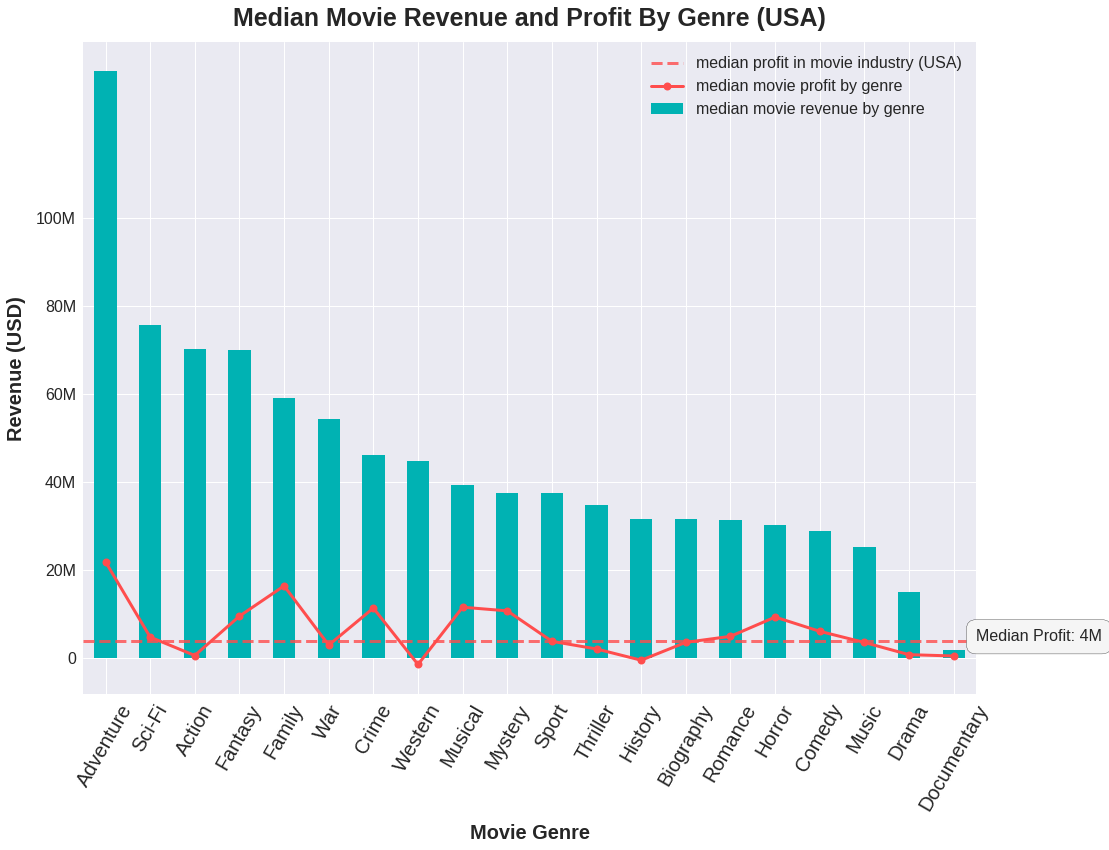

In [156]:
yticks = ['0','20M','40M','60M','80M','100M']
df_USA_gross_profit=df_USA_genres[['unique_genre','median_gross', 'median_profit', 'median_budget']].\
                                                  set_index('unique_genre').sort_values(by='median_gross', ascending=False)
fig, ax = plt.subplots()
df_USA_gross_profit['median_gross'].plot(ax=ax, kind='bar',figsize=(16, 12), color='#00b2b3')
plt.axhline(y=df_USA['profit'].median()/1000000.0, color='#ff4d4d',linestyle='--', label='median profit in movie industry (USA)', alpha=0.8,linewidth=3)
df_USA_gross_profit['median_profit'].plot(ax=ax, color='#ff4d4d', marker='o', linewidth=3, markersize=8)
plt.title("Median Movie Revenue and Profit By Genre (USA)", fontsize=25, weight="bold", y=1.015)
plt.xlabel("Movie Genre", fontsize=20, weight="bold", labelpad=10)
plt.ylabel("Revenue (USD)", fontsize=20, weight="bold", labelpad=10)
plt.xticks(fontsize=20, rotation=60)
plt.yticks(np.arange(0, 120, step=20), yticks, fontsize=16)
plt.text(x=19.5, y=df_USA['profit'].median()/1000000.0, s="Median Profit: 4M", fontsize=16,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.6"));
L=plt.legend(fontsize=16);
L.get_texts()[1].set_text('median movie profit by genre')
L.get_texts()[2].set_text('median movie revenue by genre');

*   The top movie genres are Adventure, science fiction, and fantasy. Which means these movie types are most popular in movie theater. 

*   However, let’s have a look at the profit for each genre, the red color dot line. For example, the median profit of Action movie is close to zero. Even Though action movies are popular,  the movie cost is too high to have profit.  We can see that family movie has the highest profit, because family movie is less costly.


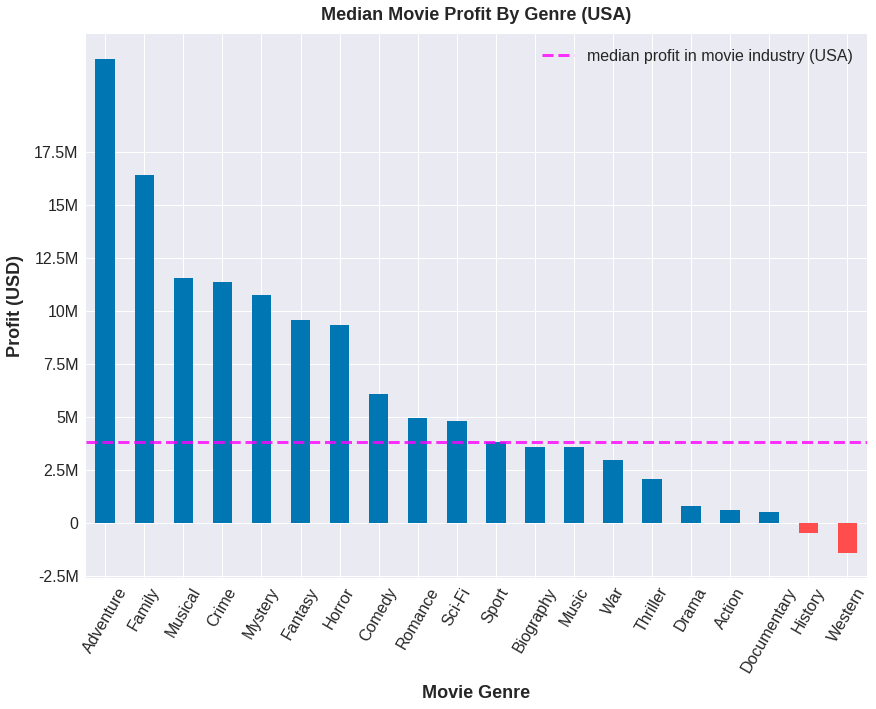

In [157]:
yticks = ['-2.5M','0','2.5M','5M','7.5M','10M','12.5M','15M','17.5M']
bar=df_USA_genres_profit['median_profit'].sort_values(ascending=False).plot(kind='bar',color=df_USA_genres_profit.color, figsize=(14, 10))
line=plt.axhline(y=df_USA['profit'].median()/1000000.0, color='fuchsia',linestyle='--', 
                 label='median profit in movie industry (USA)', alpha=0.8, linewidth=3)
plt.title("Median Movie Profit By Genre (USA)", fontsize=18, weight="bold", y=1.015)
plt.xlabel("Movie Genre", fontsize=18, weight="bold", labelpad=10)
plt.ylabel("Profit (USD)", fontsize=18, weight="bold", labelpad=10)
plt.xticks(fontsize=16, rotation=60)
plt.yticks(np.arange(-2.5,19, step=2.5), yticks, fontsize=16)
plt.legend([line], ['median profit in movie industry (USA)'], fontsize=16);
#red_patch = mpatches.Patch(color='#ff4d4d', label='negative median profit')
#green_patch = mpatches.Patch(color='#0077b3', label='positive median profit')

*   A detailed viz of movie median profit by genre. Family genre has the higest profit, Musical, Mystery, Adverture, Crime, Horror and Fantasy has very close median profit. Whereas History and Western are losing money. 

## 5.7. Movie Profitability Trending Analysis






In [0]:
df_years=df_USA.groupby('title_year').apply(lambda x: pd.Series({
                                          'profit_median':x.profit.median()/1000000.0,
                                          'profit_top_quantile':x.profit.quantile(.75)/1000000.0,
                                          'profit_bottom_quantile':x.profit.quantile(.25)/1000000.0,
                                          'flops_ratio':(x[x.profit<0].title_year.count())/x.title_year.count(),
                                          'count_of_films':x.title_year.count()})).reset_index()
df_years = df_years[df_years.count_of_films>10].round(2)

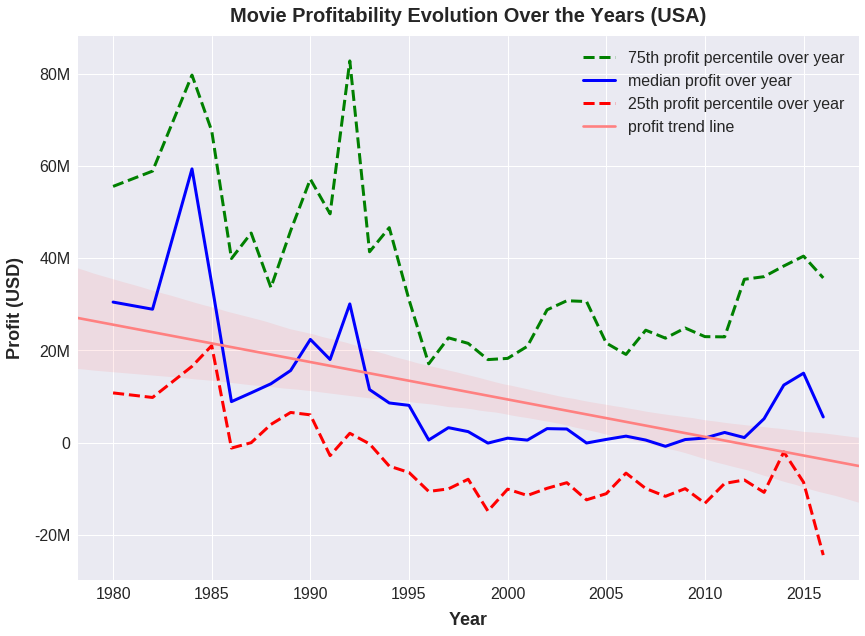

In [159]:
yticks = ['-20M','0','20M','40M','60M','80M']
df_years.set_index('title_year')[['profit_top_quantile','profit_median','profit_bottom_quantile']].\
                                                          plot(style=['--','-','--'], color=['green','blue','red'], linewidth=3,figsize=(14, 10))
sns.regplot(y='profit_median', x='title_year', data=df_years[['title_year','profit_median']], scatter=False, color='#ff8080', label='profit trend line')
plt.title("Movie Profitability Evolution Over the Years (USA)", fontsize=20, weight="bold", y=1.015)
plt.xlabel("Year", fontsize=18, weight="bold", labelpad=10)
plt.ylabel("Profit (USD)", fontsize=18, weight="bold", labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(np.arange(-20, 100, step=20), yticks, fontsize=16)
L=plt.legend(fontsize=16)
L.get_texts()[0].set_text('75th profit percentile over year')
L.get_texts()[1].set_text('median profit over year')
L.get_texts()[2].set_text('25th profit percentile over year');


*  The Movie industry's profitablity is decreasing over year.  The movie median profit trend has a downward slope.

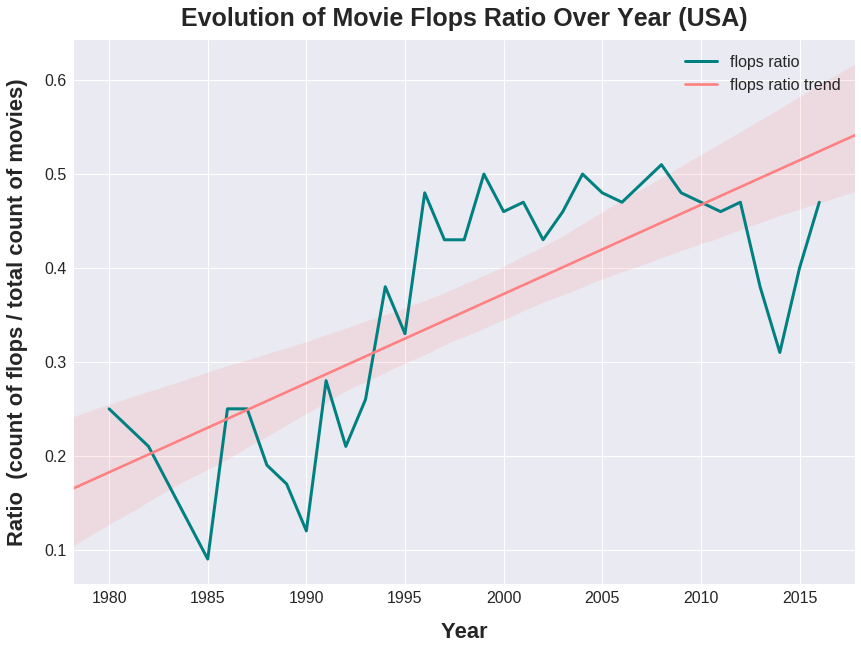

In [160]:
df_years.set_index('title_year')[['flops_ratio']].plot(color='teal', linewidth=3,figsize=(14, 10))
sns.regplot(y='flops_ratio', x='title_year', data=df_years[['title_year','flops_ratio']], scatter=False, color='#ff8080', label='flops ratio trend')
plt.title("Evolution of Movie Flops Ratio Over Year (USA)", fontsize=25, weight="bold", y=1.015)
plt.xlabel("Year", fontsize=22, weight="bold", labelpad=16)
plt.ylabel("Ratio  (count of flops / total count of movies)", fontsize=22, weight="bold", labelpad=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
L=plt.legend(fontsize=16)
L.get_texts()[0].set_text('flops ratio');

*  The flops ratio keeps increasing. 
*  In recent 20 year, the movie flops ratio is around 50%, which mean half movies have lost money. That means movie industry is quite risky. 


## 5.8. Top and Least Profitable Movies



In [0]:
df_bottom_10_movie=df_USA.nsmallest(10,'profit')[['movie_title','profit']]

df_top_10_movie=df_USA.nlargest(10,'profit')[['movie_title','profit']]

df_top_bottom_movie=pd.concat([df_bottom_10_movie, df_top_10_movie], ignore_index=True).sort_values(by='profit', ascending=False)

In [0]:
df_top_bottom_movie['profit']=round(df_top_bottom_movie['profit']/1000000.0, 2)

In [0]:
df_top_bottom_movie['color'] = df_top_bottom_movie['profit'].apply(lambda x: '#ff8080' if x>0 else 'teal')

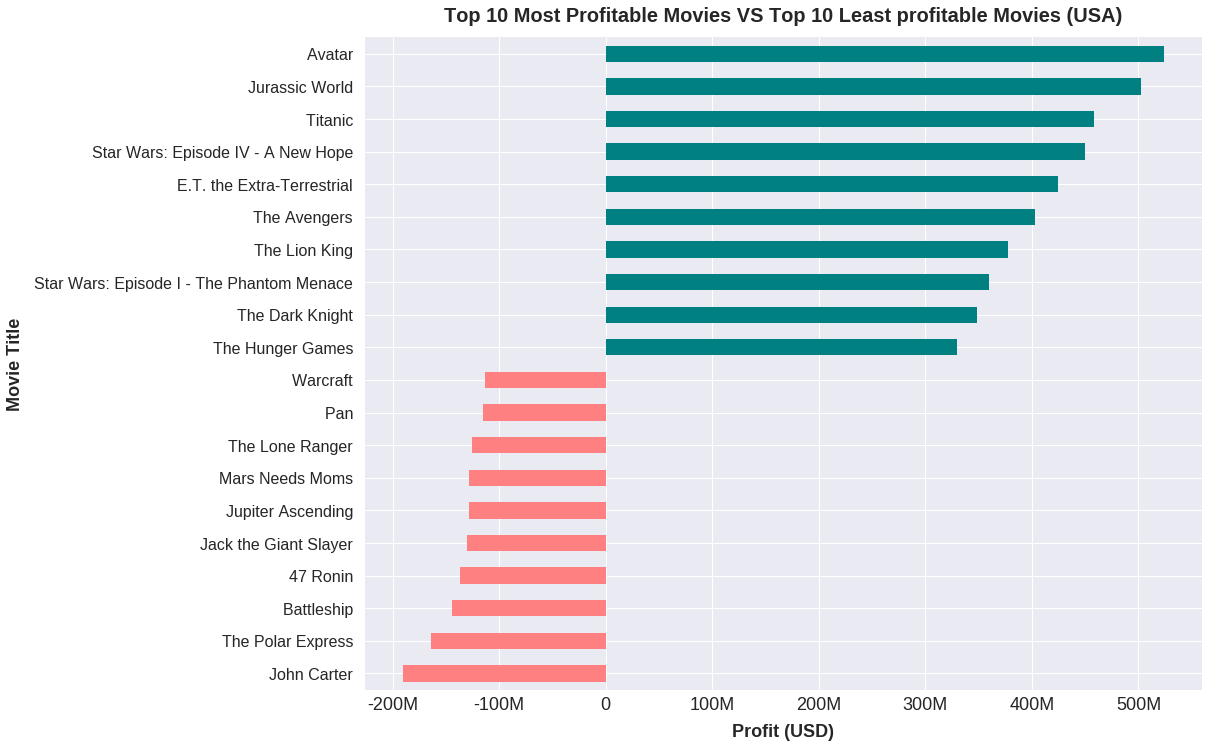

In [164]:
xticks = ['-200M','-100M','0','100M','200M','300M','400M','500M']
ax=df_top_bottom_movie.set_index('movie_title')['profit'].sort_values().plot(kind='barh',color=df_top_bottom_movie.color,figsize=(15, 12))
plt.title("Top 10 Most Profitable Movies VS Top 10 Least profitable Movies (USA)", fontsize=20, weight="bold", y=1.015)
plt.xlabel("Profit (USD)", fontsize=18, weight="bold", labelpad=10)
plt.ylabel("Movie Title", fontsize=18, weight="bold", labelpad=10)
plt.xticks(np.arange(-200,600, step=100), xticks, fontsize=18)
plt.yticks(fontsize=16);

*  Avatar and Jurassic World have the highest profit of around 500 millsion. 
*  John Carter and The Polar Express have lost money of around 150M to 180M.